![Astrofisica Computacional](../logo.PNG)

---
## 01.  Python Integrators. Geodesic Equations in Schwarzschild Spacetime 

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will illustrate the use of a `Python` integrator to solve the equations of motion of a test particle in Schwarzschild spacetime. 

---

## Lagrangian and Hamiltonian Formulation

In order to obtain the equations of motion (geodesics) for a test particle in the Schwarzschild spacetime, we wil begin with the Lagrangian,

\begin{equation}
L = \frac{1}{2} g_{\mu \nu} \dot{x}^\mu \dot{x}^\nu,
\end{equation}

where $\dot{x}^\mu = \frac{dx^\mu}{d\tau}$ with $\tau$ is the proper time for massive particles (or an affine parameter for massless particles). Using the Schwarzschild metric tensor given by the line element

\begin{equation}
ds^2 = g_{\mu \nu} dx^\mu dx^\nu = -\left( 1- \frac{2GM}{r}\right) dt^2 + \frac{dr^2}{\left( 1- \frac{2GM}{r}\right)} + r^2 d\theta^2 + r^2 \sin^2 \theta d\phi^2,
\end{equation}

we write the Lagrangian as

\begin{equation}
L = \frac{1}{2}\left[ -\left( 1- \frac{2GM}{r}\right) \dot{t}^2 + \frac{\dot{r}^2}{\left( 1- \frac{2GM}{r}\right)} + r^2 \dot{\theta}^2 + r^2 \sin^2 \theta \dot{\phi}^2 \right].
\end{equation}

From the Lagrangian dependence, it is straightforward to show the existence of two conserved quantities: the energy per unit mass, $\varepsilon$,

\begin{equation}
 p_t = \frac{\partial L}{\partial \dot{t}} = -\left( 1- \frac{2GM}{r}\right) \dot{t} = - \varepsilon
\end{equation}

and the angular momentumper unit mass, $\ell$,

\begin{equation}
p_\phi = \frac{\partial L}{\partial \dot{\phi}} = r^2 \sin^2 \theta \dot{\phi} = \ell.
\end{equation}

Now, we obtain the Hamiltonian by defining the canoncial momenta, $p_\mu = \frac{\partial L}{\partial \dot{x}^\mu}$, and applying a Legendre transfomration to the Lagrangian,

\begin{equation}
 H =  p_\mu \dot{x}^\mu - L = \frac{1}{2}g_{\alpha \beta} p^\alpha p^\beta = \frac{1}{2}g^{\alpha \beta} p_\alpha p_\beta.
\end{equation}

The Hamilton equations of motion,

\begin{cases}
\dot{x}^\mu = & \frac{\partial H}{\partial p_\mu}\\
\dot{p}_\mu = & -\frac{\partial H}{\partial x^\mu},
\end{cases}

gives the following set of 8 first order differential equations,

\begin{align}
\dot{t} = & \frac{\varepsilon}{ \left( 1- \frac{2GM}{r}\right)} \\
\dot{r} = & \left( 1- \frac{2GM}{r}\right) p_t\\
\dot{\theta} = & \frac{p_\theta}{r^2}\\
\dot{\phi} = & \frac{\ell}{r^2 \sin^2 \theta}\\
\dot{p_t} = & 0\\
\dot{p_r} = & -\frac{M \varepsilon ^2}{(r-2M)^2} - \frac{M p_r^2}{r^2} + \frac{p_\theta^2}{r^3} + \frac{\ell^2}{r^3 \sin^2 \theta}\\
\dot{p}_\theta = & \frac{\cos \theta}{\sin^3 \theta} \frac{\ell^2}{r^2}\\
\dot{p}_\phi = & 0,
\end{align}

where we have used the conserved quantities. Now we define a function with this differential equations,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



def geodesics(tau, x, M=1.):
    '''
    This function contains the geodesic equations in Hamiltonian form 
    for the Schwarzschild metric.
    Momentum compontens use lower indices
    '''
    # Coordinates and momentum components
    t = x[0]
    r = x[1]
    theta = x[2]
    phi = x[3]
    pt = x[4]
    pr = x[5]
    pth = x[6]
    pphi = x[7]

    # Conserved Quantities
    E = - pt
    L = pphi

    # Geodesics differential equations 
    dtdtau = E*r**2./(r**2 - 2.*M*r)
    drdtau = (1. - 2.*M/r)*pr
    dthdtau = pth/r**2
    dphidtau = L/((r**2)*np.sin(theta)**2)
    
    dptdtau = 0.
    dprdtau = -M*(pr**2/r**2) + pth**2/r**3 + L**2/((r**3)*np.sin(theta)**2) - M*(E**2/(r-2.*M)**2) 
    dpthdtau = (np.cos(theta)/np.sin(theta)**3)*(L**2/r**2)
    dpphidtau = 0.
    

    dxdtau = [dtdtau, drdtau, dthdtau, dphidtau, 
              dptdtau, dprdtau, dpthdtau, dpphidtau]
    return dxdtau


### Effective Potential and the Initial Conditions

In order to define the initial conditions for the motion, we will define the *effective potential*. This is obtained by noting that the Lagrangian of the test particle is related with the line element by the relation

\begin{equation}
L = \frac{1}{2}\left[ -\left( 1- \frac{2GM}{r}\right) \dot{t}^2 + \frac{\dot{r}^2}{\left( 1- \frac{2GM}{r}\right)} + r^2 \dot{\theta}^2 + r^2 \sin^2 \theta \dot{\phi}^2 \right] =\frac{1}{2} \left( \frac{ds}{d\tau}\right)^2 = \frac{\delta}{2}
\end{equation}

where $\delta$ is a constant that identifies the class of test particles described: $\delta = 0$ for massless particles and $\delta=-1$ for massive particles.

Using the definition of the conserved quantities and considering equatorial motion, i.e. $\theta= \frac{\pi}{2}$ and $\dot{\theta} = 0$, it is possible to solve for $\dot{r}$ to obtain the equation

\begin{equation}
\dot{r}^2 = \varepsilon^2 - U_{eff} (r),
\end{equation}

where we have identified the effective potential as

\begin{equation}
U_{eff} (r) = \left( 1  - \frac{2GM}{r} \right)\left( -\delta + \frac{\ell^2}{r^2} \right).
\end{equation}


Using this function, we may choose an initial condition for a particular orbit we are interested in.


Energy: 0.9813067629253164


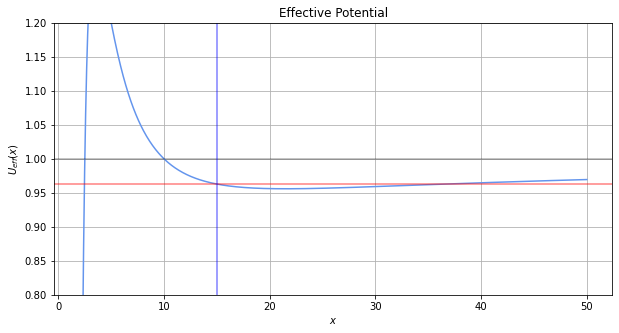

In [2]:
delta = -1

def Veff(r, L, M=1.):
    '''
    Effective Potential
    '''
    return (1 - 2*M/r)*(-delta + L**2/r**2)



# Mass of the central object
M = 1.

# Initial condition at one of the apsis
r0 = 15.
p_r0 = 0.

th0 = np.pi/2
p_th0 = 0.

phi0 = 0.

angmomentum = 5.
energy = np.sqrt(Veff(r0, L=angmomentum, M=M))
print('Energy:',energy)

p_t0 = - energy
p_phi0 = angmomentum
    
x0 = [0., r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]


rrange = np.linspace(2,50,1000)
plt.figure(figsize=(10,5))
plt.plot(rrange, Veff(rrange, L=angmomentum, M=M), color='cornflowerblue')

plt.axhline(1, color = 'black', alpha=0.3)
plt.axhline(energy**2, color = 'red', alpha=0.5)
plt.axvline(r0, color = 'blue', alpha=0.5)

plt.title('Effective Potential')
plt.xlabel(r'$x$')
plt.ylabel(r'$U_{eff}(x)$')
plt.grid()
plt.ylim(0.8,1.2)

plt.show()
    

Note that we chose the initial values for a bounded orbit:
* $t_0 = 0$
* $r_0 = 15$
* $\theta_0 = \frac{\pi}{2}$
* $\phi_0 = 0$

* $(p_t)_0 = - \varepsilon = - 0.9813067629253164$
* $(p_r)_0 = 0$
* $(p_\theta)_0 = 0$
* $(p_\phi)_0 = \ell = 5$



We will use a `Python`integrator to obtain the orbit of a test particle

In [5]:
tau_i = 0.
tau_f = 3000.
n = 10000

sol = solve_ivp(geodesics, [tau_i, tau_f], x0, t_eval = np.linspace(tau_i, tau_f,n))
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 236
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.00030003e-01, 6.00060006e-01, ...,
       2.99939994e+03, 2.99969997e+03, 3.00000000e+03])
 t_events: None
        y: array([[ 0.00000000e+00,  3.39717005e-01,  6.79433544e-01, ...,
         3.19871809e+03,  3.19903036e+03,  3.19934262e+03],
       [ 1.50000000e+01,  1.50000667e+01,  1.50002667e+01, ...,
         3.49959286e+01,  3.50014606e+01,  3.50069671e+01],
       [ 1.57079633e+00,  1.57079633e+00,  1.57079633e+00, ...,
         1.57079633e+00,  1.57079633e+00,  1.57079633e+00],
       ...,
       [ 0.00000000e+00,  5.12867650e-04,  1.02571040e-03, ...,
         1.96010873e-02,  1.95106316e-02,  1.94201825e-02],
       [ 0.00000000e+00,  2.04127608e-18,  4.08251586e-18, ...,
        -2.61450466e-15, -2.61139598e-15, -2.60829775e-15],
       [ 5.00000000e+00,  5.00000000e+00,  5.0

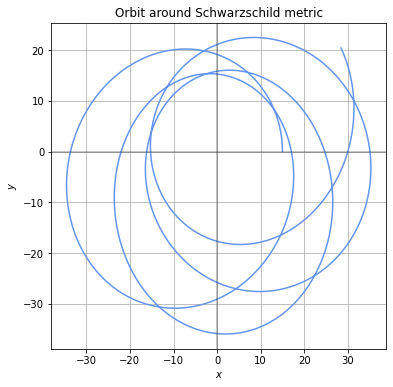

In [6]:
#Cartesian Coodinates Solution
solx = sol.y[1]*np.cos(sol.y[3])
soly = sol.y[1]*np.sin(sol.y[3])


plt.figure(figsize=(6,6))
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Orbit around Schwarzschild metric')
plt.grid()
plt.axvline(0, color='black', alpha=0.3)
plt.axhline(0, color='black', alpha=0.3)
plt.show()

### ISCO
The **I**nnermost **S**table **C**ircular **O**rbit (ISCO) in a Schwarzschild spacetime is characterized by a radius of $r_{ISCO} = 6M$ and an angular momentum of $\ell_{ISCO} = \sqrt{12}$. We will trace this trajectory now,

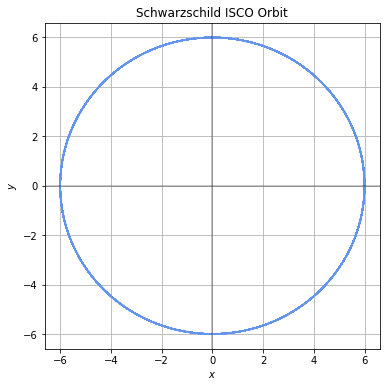

In [7]:
# ISCO

# Mass of the central object
M = 1.

# Initial condition at the ISCO
r0 = 6.
p_r0 = 0.

th0 = np.pi/2
p_th0 = 0.

phi0 = 0.

angmomentum = M*np.sqrt(12)
#energy = np.sqrt(8./9.)
energy = np.sqrt(Veff(r0, L=angmomentum, M=M))

p_t0 = - energy
p_phi0 = angmomentum
    
x0 = [0., r0, th0, phi0, p_t0, p_r0, p_th0, p_phi0]


tau_i = 0.
tau_f = 1000.
n = 10000



sol = solve_ivp(geodesics, [tau_i, tau_f], x0, t_eval = np.linspace(tau_i, tau_f,n))

#Cartesian Coodinates Solution
solx = sol.y[1]*np.cos(sol.y[3])
soly = sol.y[1]*np.sin(sol.y[3])


plt.figure(figsize=(6,6))
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Schwarzschild ISCO Orbit')
plt.grid()
plt.axvline(0, color='black', alpha=0.3)
plt.axhline(0, color='black', alpha=0.3)
plt.show()